In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

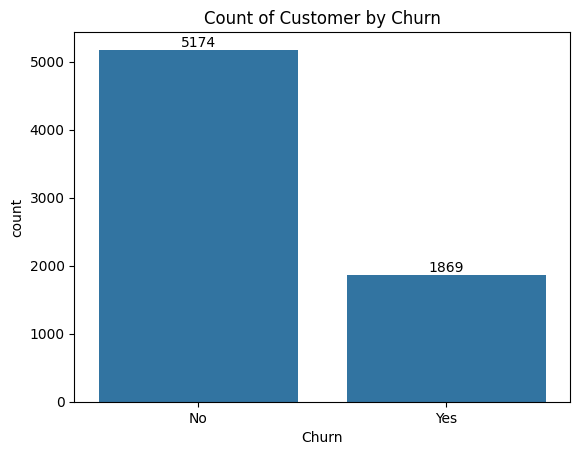

In [29]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

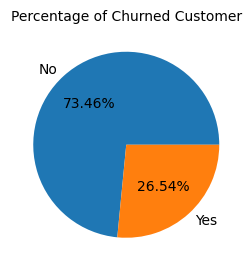

In [31]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer",fontsize=10)
plt.show()

# From the given pie chart we can conclude that 26.54% of our customers have churned out.
# now let's explore the reason behind it

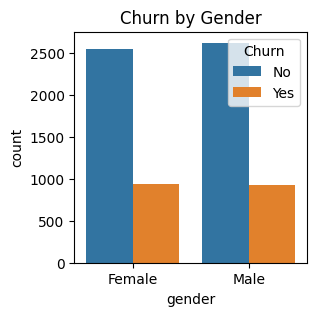

In [36]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

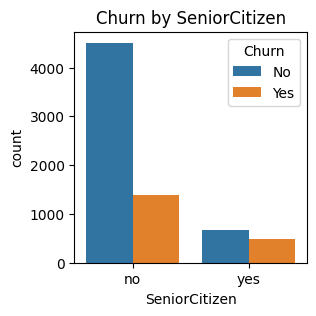

In [37]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df,hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

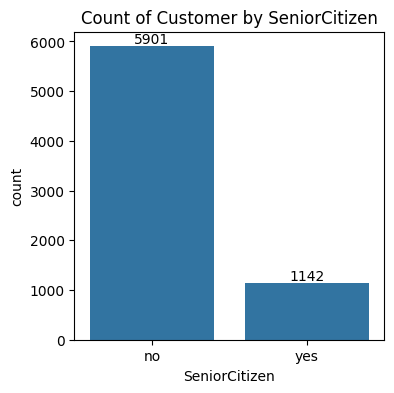

In [43]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1160\3509652360.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_data.iloc[i].cumsum()[j] - percentage_data.iloc[i][j]/2,
C:\Users\Dell\AppData\Local\Temp\ipykernel_1160\3509652360.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percentage_data.iloc[i][j]:.1f}%",
C:\Users\Dell\AppData\Local\Temp\ipykernel_1160\3509652360.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

<Figure size 400x400 with 0 Axes>

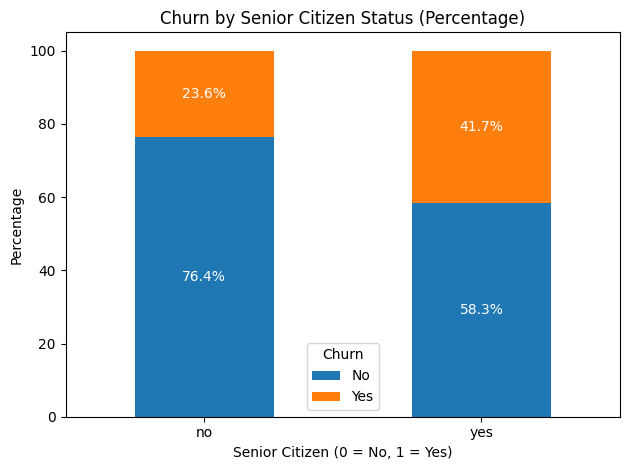

In [44]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
plt.figure(figsize=(4, 4))
percentage_data.plot(kind='bar', stacked=True)

# Adding labels to the bars
for i in range(len(percentage_data)):
    for j in range(len(percentage_data.columns)):
        plt.text(i, percentage_data.iloc[i].cumsum()[j] - percentage_data.iloc[i][j]/2, 
                 f"{percentage_data.iloc[i][j]:.1f}%", 
                 ha='center', va='center', color='white' if percentage_data.iloc[i][j] > 5 else 'black')

plt.title("Churn by Senior Citizen Status (Percentage)")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



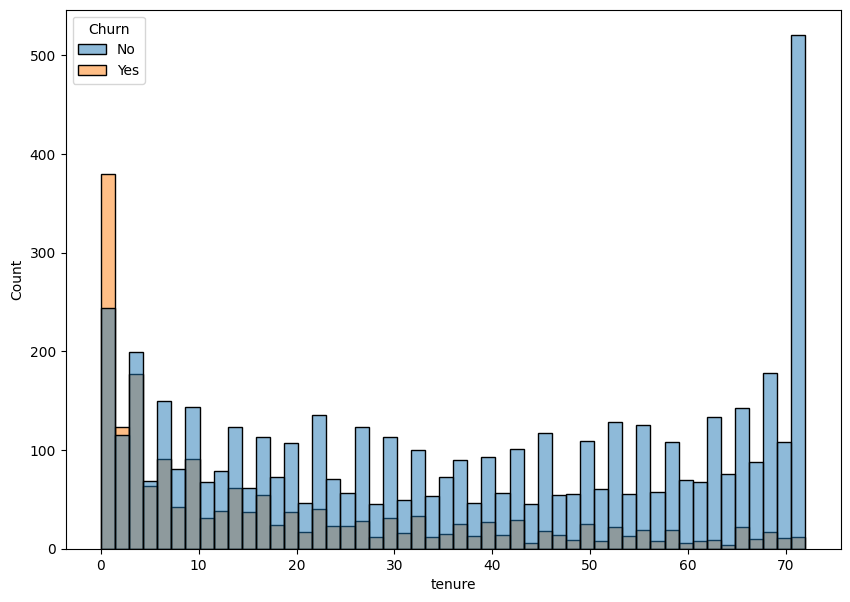

In [16]:
plt.figure(figsize = (10,7))
sns.histplot(x = "tenure",data = df,bins = 50,hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed and people who ahve used our 
service have churned

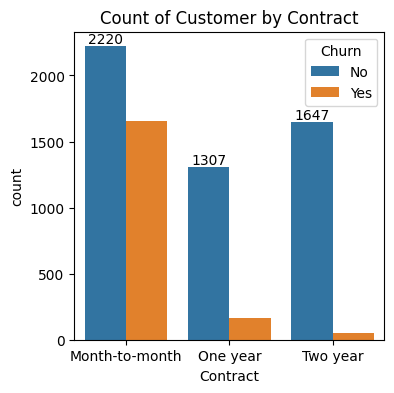

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2
years or contract.

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

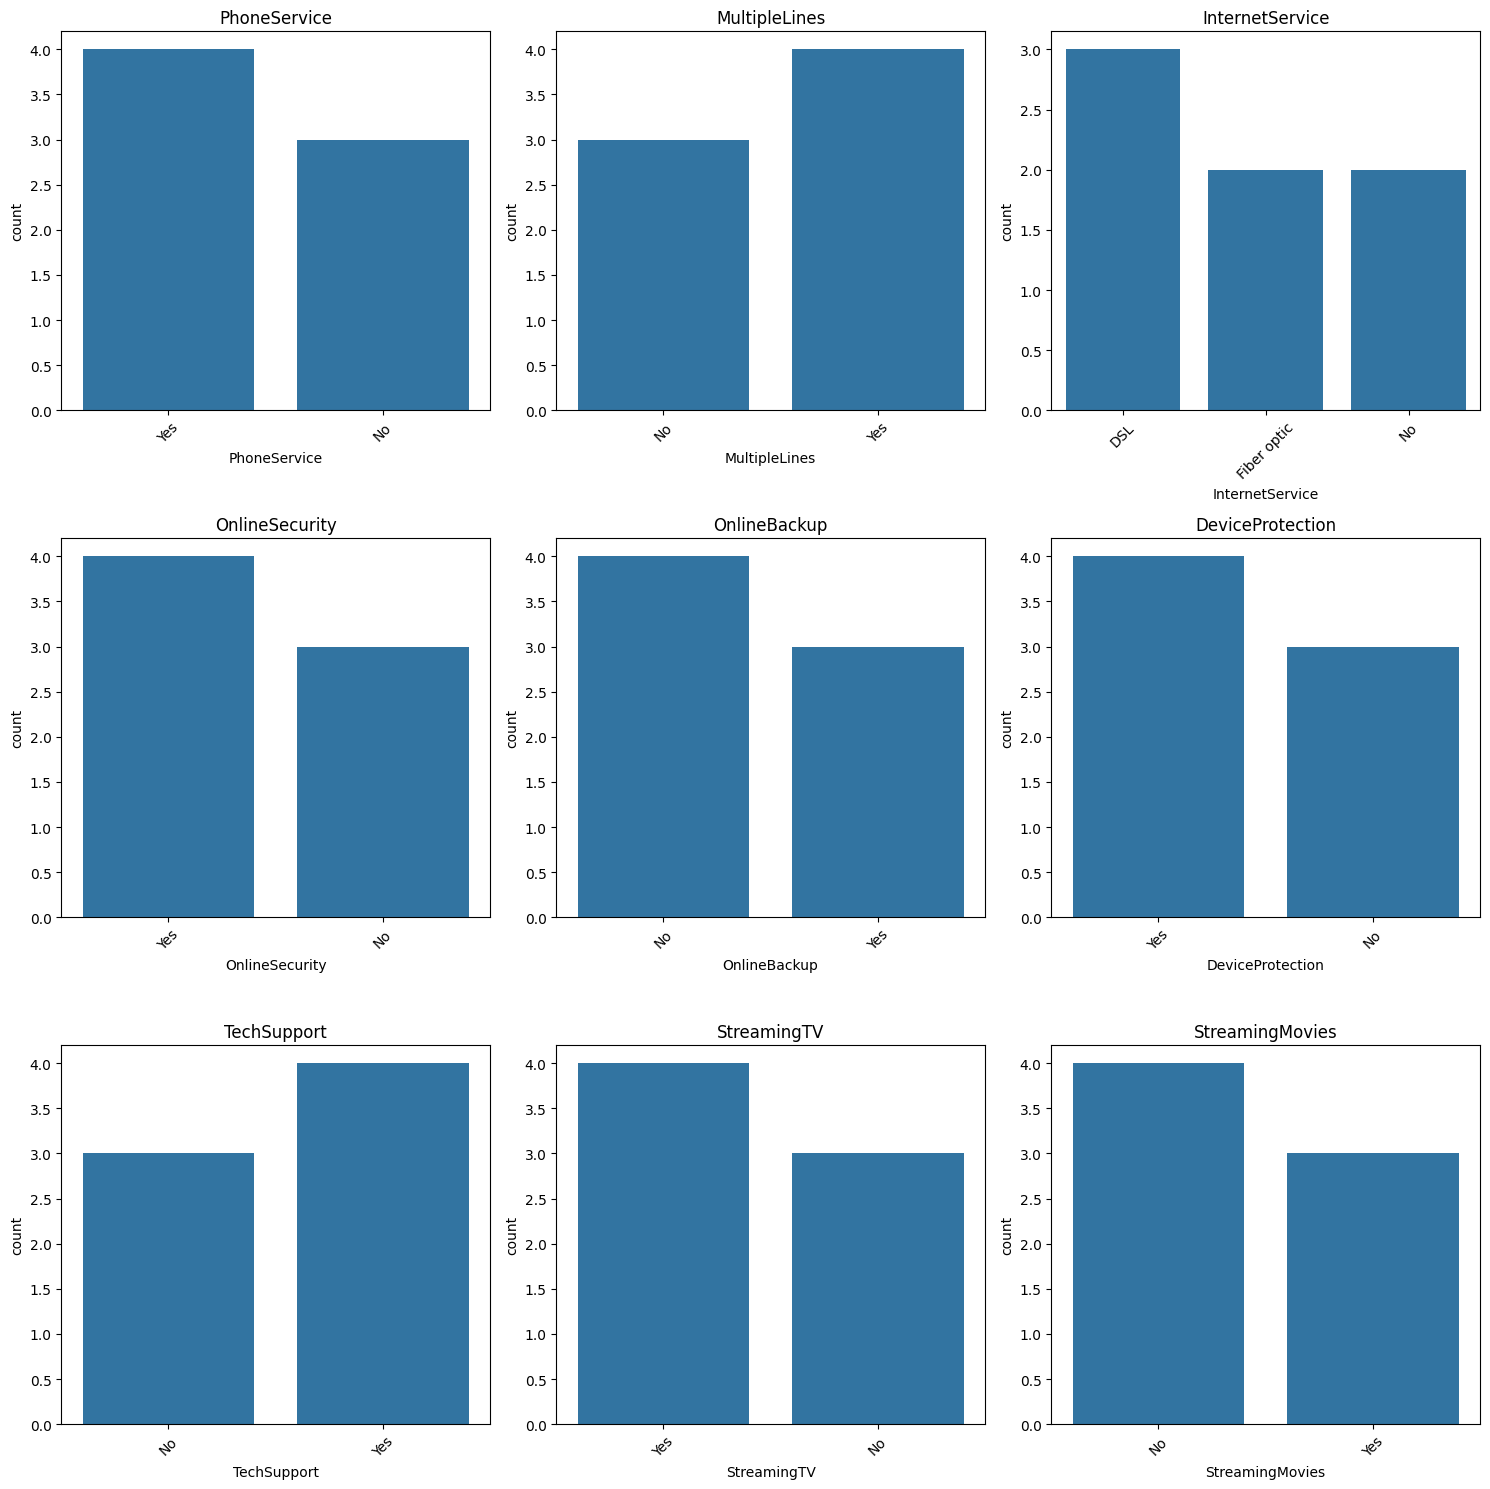

In [36]:


# Sample DataFrame creation (replace this with your actual data loading)
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'No', 'DSL', 'Fiber optic', 'No', 'DSL'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'DeviceProtection': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'TechSupport': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Define the columns for plotting
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the matplotlib figure
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size as needed

# Create subplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()  # Adjusts subplot parameters for better spacing
plt.show()


#The majority of customers who do not churn tend to have services like PhoneService,
InternetService, and online security enabled.Online backup,TechSupport,and StremingTV